# Radar rainfall and sump level import and visualisation

In [4]:
#import the neccessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

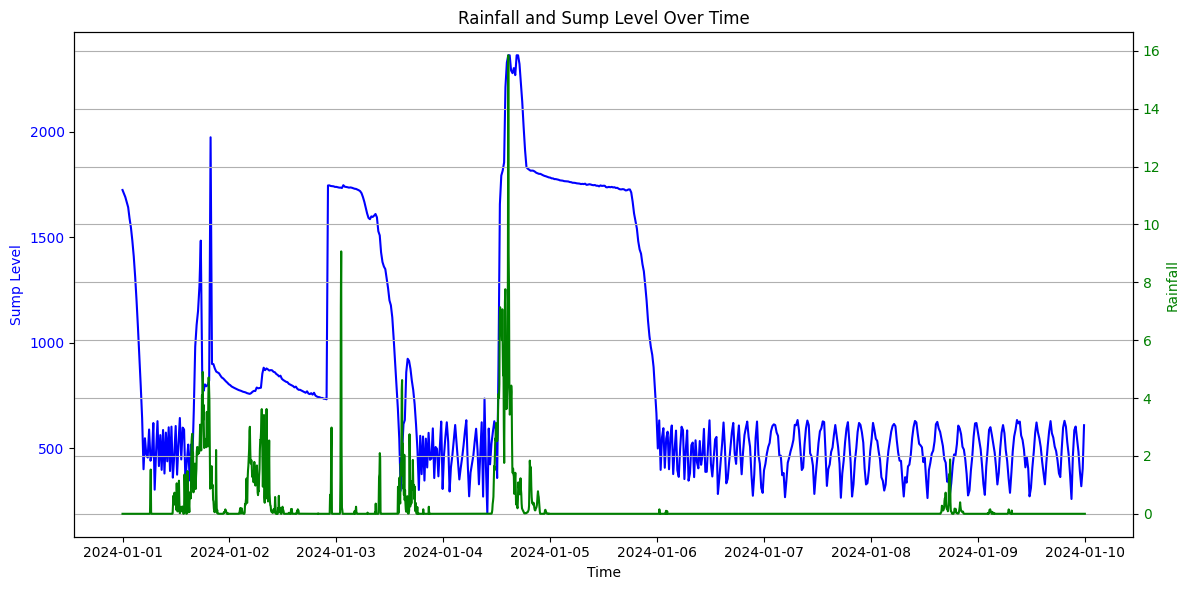

In [5]:


# Define the file paths (raw URLs)
sump_level_file = 'https://raw.githubusercontent.com/McGinty666/Rainfall-and-spill-analysis/main/West%20bexingfton%20sump%20level%20from%20Jan%202024.xlsx'
rainfall_file = 'https://raw.githubusercontent.com/McGinty666/Rainfall-and-spill-analysis/main/west%20bexington%20rainfall%20from%201-10-2023.xlsx'

# Define the starting row and start time for rainfall data
start_row = 21
rainfall_start_time = datetime.strptime("01/10/2023 00:00", "%d/%m/%Y %H:%M")

# Read the Excel file for sump level data
df_sump = pd.read_excel(sump_level_file, sheet_name='Sheet1', header=None, engine='openpyxl')
df_sump.columns = ["signal", "time", "level"]
df_sump["time"] = pd.to_datetime(df_sump["time"])

# Read the Excel file for rainfall data
df_rainfall = pd.read_excel(rainfall_file, sheet_name='Sheet1', skiprows=start_row-1, engine='openpyxl')
df_rainfall.replace(99, 0, inplace=True)
df_rainfall['mean rainfall'] = df_rainfall.mean(axis=1)
df_rainfall.insert(0, 'timestamp', [rainfall_start_time + timedelta(minutes=5*i) for i in range(len(df_rainfall))])

# Function to plot rainfall and sump level on separate y axes against time
def plot_rainfall_and_sump_level(start_time, end_time):
    # Convert start and end times to datetime
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)

    # Filter the dataframes based on the specified time interval
    df_sump_filtered = df_sump[(df_sump["time"] >= start_time) & (df_sump["time"] <= end_time)]
    df_rainfall_filtered = df_rainfall[(df_rainfall["timestamp"] >= start_time) & (df_rainfall["timestamp"] <= end_time)]

    # Create a figure and axis objects
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot sump level on the first y-axis
    ax1.plot(df_sump_filtered["time"], df_sump_filtered["level"], color='blue', label='Sump Level')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Sump Level', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a second y-axis for rainfall
    ax2 = ax1.twinx()
    ax2.plot(df_rainfall_filtered["timestamp"], df_rainfall_filtered["mean rainfall"], color='green', label='Rainfall')
    ax2.set_ylabel('Rainfall', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Add title and grid
    plt.title('Rainfall and Sump Level Over Time')
    fig.tight_layout()
    plt.grid(True)

    # Show the plot
    plt.show()

# Example usage with user-specified time interval
start_time = "2024-01-01 00:00:00"
end_time = "2024-01-10 00:00:00"
plot_rainfall_and_sump_level(start_time, end_time)

